In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import os

2023-12-25 14:21:32.356810: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-25 14:21:33.371427: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
def checkfilepath(filepath):
    return os.path.exists(filepath)

def read_nifti_file(filepath):
    scan = nib.load(filepath)
    data = scan.get_fdata()
    return data

def normalize(volume):
    dmin = np.amin(volume)
    dmax = np.amax(volume)
    davg = np.average(volume)
    volume = (volume-dmin)/davg
    return volume

def process_scan(path):
    vol = read_nifti_file(path)
    vol = normalize(vol)
    return vol


In [3]:
df = pd.read_excel('/lfs1/ashaji/Imputation_Problem/data/ADNI_final.xlsx', engine='openpyxl')
df['SubjID'].replace('',np.nan,inplace=True)
df['AGE_at_scan'].replace('',np.nan,inplace=True)
df.dropna(subset=['SubjID','AGE_at_scan'], inplace=True)
df = df.reset_index(drop=True)
df.loc[df['SEX']=='M','SEX'] = 1
df.loc[df['SEX']=='F','SEX'] = 0
condCN = df['DX'] == 'CN'
df = df.sort_values(by = ['SubjID'])
df = df.loc[condCN,:]
# df = df.sample(frac = 1)
df = df.reset_index(drop=True)

In [4]:
df['SEX'].replace('',np.nan,inplace=True)
df['CDRSB'].replace('',np.nan,inplace=True)
df['ADAS11'].replace('',np.nan,inplace=True)
df['ADAS13'].replace('',np.nan,inplace=True)
df['MMSE'].replace('',np.nan,inplace=True)
df['MOCA'].replace('',np.nan,inplace=True)
df['APOE A1'].replace('',np.nan,inplace=True)
df['APOE A2'].replace('',np.nan,inplace=True)
# df.dropna(subset=['SEX','CDRSB','ADAS11','ADAS13','MMSE','MOCA','APOE A1','APOE A2'], inplace=True)

In [5]:
cond = [checkfilepath(str(x)) for x in df['ACCEL_DL_6DOF_2MM_T1']]
cond0 = df['ACCEL_Preprocessed for DL?']=='yes'

In [6]:
conddwi = [checkfilepath(str(x)) for x in df['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM']]

In [7]:
cond2 = df['SEX'].isnull()
cond2 = np.invert(cond2)
cond3 = df['CDRSB'].isnull()
cond3 = np.invert(cond3)
cond4 = df['ADAS11'].isnull()
cond4 = np.invert(cond4)
cond5 = df['ADAS13'].isnull()
cond5 = np.invert(cond5)
cond6 = df['MMSE'].isnull()
cond6 = np.invert(cond6)
cond7 = df['MOCA'].isnull()
cond7 = np.invert(cond7)
cond8 = df['APOE A1'].isnull()
cond8 = np.invert(cond8)
cond9 = df['APOE A2'].isnull()
cond9 = np.invert(cond9)

In [8]:
condt1 = [cond[i] & cond0[i]  for i in range(len(cond))]

In [9]:
condstr = cond2 & cond3 & cond4 & cond5 & cond6 & cond7 & cond8 & cond9

In [10]:
t1dwistr = df.loc[[(condt1[i] and conddwi[i] and condstr[i]) for i in range(len(condt1))]  , :]
len(t1dwistr)

458

In [11]:
t1dwi_str = df.loc[[(condt1[i] and not conddwi[i] and condstr[i]) for i in range(len(condt1))] , :]
len(t1dwi_str)

1255

In [12]:
t1dwi_str_ = df.loc[[(condt1[i] and not conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1dwi_str_)

329

In [13]:
t1_dwi_str = df.loc[[(not condt1[i] and not conddwi[i] and condstr[i]) for i in range(len(condt1))] , :]
len(t1_dwi_str)

107

In [14]:
t1dwistr_ = df.loc[[(condt1[i] and conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1dwistr_)

74

In [15]:
t1_dwistr_ = df.loc[[(not condt1[i] and conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1_dwistr_)

0

In [16]:
t1_dwistr = df.loc[[(not condt1[i] and conddwi[i] and condstr[i]) for i in range(len(condt1))] , :]
len(t1_dwistr)

13

In [17]:
t1dwi_str_ = df.loc[[(condt1[i] and not conddwi[i] and not condstr[i]) for i in range(len(condt1))] , :]
len(t1dwi_str_)

329

In [18]:
df = df.reset_index(drop=True)
df.head(20)

,SubjID,RID,NONACCEL_T1_SCAN_FILENAME,NONACCEL_T1_IMAGEID,NONACCEL_Path to RAW nifti,NONACCEL_Preprocessed for DL?,NONACCEL_DL_6DOF_2MM_T1,NONACCEL_DL_6DOF_2MM_MASK,NONACCEL_DL_6DOF_2MM_GM,NONACCEL_DL_6DOF_2MM_WM,...,DWI_Matched_File_L1_Path_ENIGMATBSSspace,DWI_Matched_File_MD_Path_ENIGMATBSSspace,DWI_Matched_File_RD_Path_ENIGMATBSSspace,T1_Path_ENIGMATBSSspace,DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_L1_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_MD_Path_ENIGMATBSSspace_2MM,DWI_Matched_File_RD_Path_ENIGMATBSSspace_2MM,T1_Path_ENIGMATBSSspace_2MM,DWI Preprocessing Pipeline (old=ADNI2 - new=ADNI3)
0,002_S_0295,295,002_S_0295_20060418_A1_T1_1.5T_nonaccel_Preproc,45108.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,002_S_0295,295,002_S_0295_20061102_A1_T1_1.5T_nonaccel_Preproc,40966.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,002_S_0295,295,002_S_0295_20070525_A1_T1_1.5T_nonaccel_Preproc,64025.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,002_S_0295,295,002_S_0295_20080723_A1_T1_1.5T_nonaccel_Preproc,123685.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,002_S_0295,295,002_S_0295_20090522_A1_T1_1.5T_nonaccel_Preproc,150177.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,002_S_0295,295,002_S_0295_20100513_A1_T1_1.5T_nonaccel_Preproc,291869.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,002_S_0295,295,002_S_0295_20110602_A2_T1_3T_nonaccel_Preproc,241350.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,002_S_0295,295,002_S_0295_20120510_A2_T1_3T_nonaccel_Preproc,308078.0,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,yes,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,/nas/bioint-data/neuroimaging-data/ADNI/6DOF/0...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,002_S_0413,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/bioint-data/neuroimaging-data/ADNI/Organi...,/nas/

In [19]:
import nibabel as nib
from tensorflow import keras
from tensorflow.keras import layers
import random as pyrandom
import tensorflow_addons as tfa
from tensorflow.keras.preprocessing import image_dataset_from_directory

import nibabel as nib
from scipy import ndimage
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, accuracy_score, f1_score, precision_score, recall_score, auc, roc_auc_score
from sklearn.utils import class_weight
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]= "6"

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

/lfs1/ashaji/condawork/lib/python3.10/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Num GPUs Available:  1


In [20]:
### Hyperparameter config

init_lr = 1e-4
epochs = 50
early_stop = 100
seed = 53
drop_out = 0.5
weight_decay = 1e-4

batch_size=4
test_batch_size=4

In [21]:
def getCNN(width = 91,height = 109, depth = 91):
    
    def conv_block(inp,filt,name):
        inp = tf.keras.layers.Conv3D(filt,3,strides=1,padding='same')(inp)
        inp = tfa.layers.InstanceNormalization(center=False,scale=False)(inp)
        inp = tf.keras.layers.MaxPooling3D(2,strides=2,padding = 'valid')(inp)
        inp = tf.nn.relu(inp)
        return inp
    
    img0 = tf.keras.Input((91,109,91,1),name='inp0')
    inp0 = conv_block(img0,32,'conv_block1')
    inp0 = conv_block(inp0,64,'conv_block2')
    inp0 = conv_block(inp0,128,'conv_block3')
    inp0 = conv_block(inp0,256,'conv_block4')
    inp0 = conv_block(inp0,256,'conv_block5')
    
    ##LAST LAYER
    
    inp0 = tf.keras.layers.Conv3D(64,1,strides=1,padding='same')(inp0)
    inp0 = tfa.layers.InstanceNormalization(center=False,scale=False)(inp0)
    inp0 = tf.nn.relu(inp0)
    inp0 = tf.keras.layers.AveragePooling3D(2,2,'valid')(inp0)
    
    inp0 = tf.keras.layers.Dropout(rate=0.5,name='drop')(inp0)
        
#     out0 = tf.keras.layers.Conv3D(1,1,strides=1,name='regconv1')(inp0)
    out0 = tf.keras.layers.Flatten(name='flatten1')(inp0)
    
    def ann_block(inp,num,name):
        inp = tf.keras.layers.Dense(num)(inp)
        inp = tfa.layers.InstanceNormalization(center=False,scale=False)(inp)
        inp = tf.nn.relu(inp)
        return inp
    
    ##############
    
    strct = tf.keras.Input((8),name='inp2')
    inp2 = ann_block(strct,32,'ann1')
    out2 = ann_block(inp2,16,'ann2')
    
    #LAST LAYER
    ##############
    
    ###FUSION LAYER
    concout= tf.keras.layers.Concatenate()([out0,out2])
    out4 = tf.keras.layers.Dense(units=32,activation='relu',name='out4')(concout)
    out3 = tf.keras.layers.Dense(units=1,name='age')(out4)    
    
    model = keras.Model([img0,strct],out3,name='3DCNN')
    return model

model = getCNN()
model.summary()
    

2023-12-25 14:22:02.245742: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10534 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:0e:00.0, compute capability: 6.1


Model: "3DCNN"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 inp0 (InputLayer)              [(None, 91, 109, 91  0           []                               
                                , 1)]                                                             
                                                                                                  
 conv3d (Conv3D)                (None, 91, 109, 91,  896         ['inp0[0][0]']                   
                                 32)                                                              
                                                                                                  
 instance_normalization (Instan  (None, 91, 109, 91,  0          ['conv3d[0][0]']                 
 ceNormalization)                32)                                                          

                                                                                                  
 average_pooling3d (AveragePool  (None, 1, 1, 1, 64)  0          ['tf.nn.relu_5[0][0]']           
 ing3D)                                                                                           
                                                                                                  
 dense_1 (Dense)                (None, 16)           528         ['tf.nn.relu_6[0][0]']           
                                                                                                  
 drop (Dropout)                 (None, 1, 1, 1, 64)  0           ['average_pooling3d[0][0]']      
                                                                                                  
 instance_normalization_7 (Inst  (None, 16)          0           ['dense_1[0][0]']                
 anceNormalization)                                                                               
          

In [22]:
dwistr = df.loc[[(conddwi[i] and condstr[i]) for i in range(len(conddwi))]  , :]

In [23]:
len(dwistr)

471

In [24]:
train = dwistr.drop(t1dwistr.index)

In [25]:
len(train)

13

In [26]:
p = (np.ceil(0.7*len(t1dwistr))-1).astype(int)
q = (np.ceil(0.9*len(t1dwistr))-2).astype(int)
r = len(t1dwistr)
trainn = p
valn  = r - q
testn   = q - p
trainn, testn, valn
trainall = t1dwistr[:p]
testall  = t1dwistr[p:q]
valall   = t1dwistr[q:]
len(trainall), len(testall), len(valall)

(320, 91, 47)

In [27]:
datamix = [train,trainall,valall]
alltrain = pd.concat(datamix)
alltrain = alltrain.sort_values(by = ['SubjID'])
#df = df.sort_values(by = ['SubjID'])

In [28]:
len(alltrain)

380

In [29]:
for i in alltrain['SubjID']:
    for j in testall['SubjID']:
        if i == j:
            print(i)

In [33]:
p = (np.ceil(0.8*len(alltrain))-1).astype(int)
q = len(alltrain)

In [34]:
trainn = p
# valn  = r - q
valn   = q - p
trainn, valn, trainn + valn

(303, 77, 380)

In [35]:
trainds = alltrain[:p]
valds   = alltrain[p:]

In [48]:
len(trainds),len(valds),len(testall)

(303, 77, 91)

In [40]:
for i in trainds['SubjID']:
    for j in testall['SubjID']:
        if i==j:
            print(i)

/tmp/ipykernel_40013/1918704807.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=trainds.AGE_at_scan, hist=False)
/tmp/ipykernel_40013/1918704807.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(a=testall.AGE_at_scan, hist=False)


<Axes: xlabel='AGE_at_scan', ylabel='Density'>

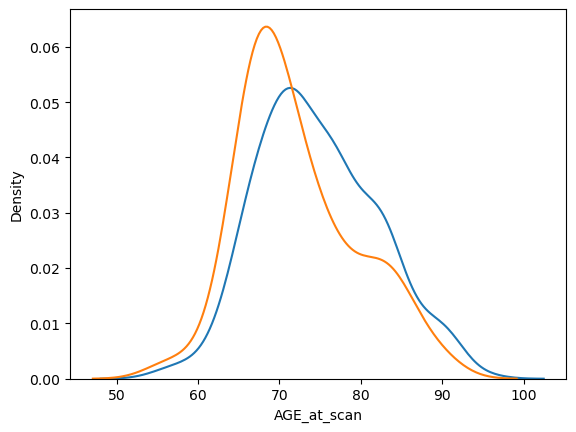

In [36]:
import seaborn as sns
sns.distplot(a=trainds.AGE_at_scan, hist=False)
sns.distplot(a=testall.AGE_at_scan, hist=False)

In [41]:
class DataGenerator(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol


    def preprocessing(self,vol):
        if(self.isTrain):
            vol1 = self.rotate(vol)
            vol1 = tf.expand_dims(vol1,axis=3)
        else:
            vol1 = tf.expand_dims(vol,axis=3)
        return vol1
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume

    def __init__(self, data, batch_size, sample_weights=None,isTrain=True):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights
        self.isTrain = isTrain

    def __len__(self):
        return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx):
        
        ###########
        ann = self.data[['SEX','CDRSB','ADAS11','ADAS13','MMSE','MOCA','APOE A1','APOE A2']].values.tolist()
        dwi = self.data['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        
        batch_dwi = dwi[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_ann = ann[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        dwi_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_dwi])
        ann_inp = np.asarray(batch_ann)
        ###########
        return ([dwi_imgs,ann_inp], np.array(batch_y))
    
    def on_epoch_end(self):
        if(self.isTrain):
            self.data = self.data.sample(frac=1)

In [42]:
dg_testall = DataGenerator(testall,4,isTrain=False)

In [43]:
dg_train = DataGenerator(trainds,4)
dg_val = DataGenerator(valds,4,isTrain=False)

In [44]:
os.getpid()

6693

In [45]:
model.compile(
    loss='mse',
    optimizer = keras.optimizers.AdamW(learning_rate=1e-3,weight_decay=1e-4),
    metrics = [tf.keras.metrics.RootMeanSquaredError(name='rmse'),tf.keras.metrics.MeanAbsoluteError(name='mae')]   
)
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20, verbose = 1, restore_best_weights = True)

history = model.fit(
    dg_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTR')

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-25 15:08:39.876841: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-12-25 15:08:43.900471: I tensorflow/compiler/xla/stream_executor

75/75 [==============================] - ETA: 0s - loss: 4717.9175 - rmse: 68.6871 - mae: 68.2299

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

75/75 [==============================] - 69s 793ms/step - loss: 4717.9175 - rmse: 68.6871 - mae: 68.2299 - val_loss: 3567.3052 - val_rmse: 59.7269 - val_mae: 59.3814
Epoch 2/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 2673.9133 - rmse: 51.7099 - mae: 50.6491

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 800ms/step - loss: 2673.9133 - rmse: 51.7099 - mae: 50.6491 - val_loss: 1412.9563 - val_rmse: 37.5893 - val_mae: 37.0379
Epoch 3/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 836.4062 - rmse: 28.9207 - mae: 26.5332

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 788ms/step - loss: 836.4062 - rmse: 28.9207 - mae: 26.5332 - val_loss: 275.2152 - val_rmse: 16.5896 - val_mae: 15.2986
Epoch 4/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 263.5668 - rmse: 16.2347 - mae: 13.2619

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 785ms/step - loss: 263.5668 - rmse: 16.2347 - mae: 13.2619 - val_loss: 62.1745 - val_rmse: 7.8851 - val_mae: 6.2345
Epoch 5/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 147.2151 - rmse: 12.1332 - mae: 9.8078

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 56s 745ms/step - loss: 147.2151 - rmse: 12.1332 - mae: 9.8078 - val_loss: 42.9042 - val_rmse: 6.5501 - val_mae: 5.2488
Epoch 6/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 188.5265 - rmse: 13.7305 - mae: 10.9704

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 791ms/step - loss: 188.5265 - rmse: 13.7305 - mae: 10.9704 - val_loss: 43.8295 - val_rmse: 6.6204 - val_mae: 5.2706
Epoch 7/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 153.2132 - rmse: 12.3779 - mae: 10.1222

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 797ms/step - loss: 153.2132 - rmse: 12.3779 - mae: 10.1222 - val_loss: 44.2287 - val_rmse: 6.6505 - val_mae: 5.4634
Epoch 8/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 164.4281 - rmse: 12.8230 - mae: 10.2316

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 769ms/step - loss: 164.4281 - rmse: 12.8230 - mae: 10.2316 - val_loss: 44.0046 - val_rmse: 6.6336 - val_mae: 5.4584
Epoch 9/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 154.0394 - rmse: 12.4113 - mae: 9.9360

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 61s 812ms/step - loss: 154.0394 - rmse: 12.4113 - mae: 9.9360 - val_loss: 41.7201 - val_rmse: 6.4591 - val_mae: 5.2121
Epoch 10/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 149.6675 - rmse: 12.2339 - mae: 9.8851

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 774ms/step - loss: 149.6675 - rmse: 12.2339 - mae: 9.8851 - val_loss: 45.7937 - val_rmse: 6.7671 - val_mae: 5.5406
Epoch 11/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 167.1472 - rmse: 12.9285 - mae: 10.3853

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 797ms/step - loss: 167.1472 - rmse: 12.9285 - mae: 10.3853 - val_loss: 40.9493 - val_rmse: 6.3992 - val_mae: 5.2177
Epoch 12/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 162.6292 - rmse: 12.7526 - mae: 10.0441

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 789ms/step - loss: 162.6292 - rmse: 12.7526 - mae: 10.0441 - val_loss: 42.5493 - val_rmse: 6.5230 - val_mae: 5.3576
Epoch 13/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 146.1273 - rmse: 12.0883 - mae: 9.7216

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 793ms/step - loss: 146.1273 - rmse: 12.0883 - mae: 9.7216 - val_loss: 41.0197 - val_rmse: 6.4047 - val_mae: 5.2097
Epoch 14/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 145.6066 - rmse: 12.0668 - mae: 9.5267

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 766ms/step - loss: 145.6066 - rmse: 12.0668 - mae: 9.5267 - val_loss: 42.6192 - val_rmse: 6.5283 - val_mae: 5.3669
Epoch 15/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 141.2977 - rmse: 11.8869 - mae: 9.5528

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 795ms/step - loss: 141.2977 - rmse: 11.8869 - mae: 9.5528 - val_loss: 43.2437 - val_rmse: 6.5760 - val_mae: 5.3999
Epoch 16/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 156.2363 - rmse: 12.4995 - mae: 10.0445

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 57s 763ms/step - loss: 156.2363 - rmse: 12.4995 - mae: 10.0445 - val_loss: 40.5765 - val_rmse: 6.3700 - val_mae: 5.1930
Epoch 17/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 130.0757 - rmse: 11.4051 - mae: 9.1376

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 791ms/step - loss: 130.0757 - rmse: 11.4051 - mae: 9.1376 - val_loss: 45.0000 - val_rmse: 6.7082 - val_mae: 5.5046
Epoch 18/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 174.0611 - rmse: 13.1932 - mae: 10.4877

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 782ms/step - loss: 174.0611 - rmse: 13.1932 - mae: 10.4877 - val_loss: 49.9863 - val_rmse: 7.0701 - val_mae: 5.7580
Epoch 19/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 138.5166 - rmse: 11.7693 - mae: 9.2691

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 796ms/step - loss: 138.5166 - rmse: 11.7693 - mae: 9.2691 - val_loss: 40.6225 - val_rmse: 6.3736 - val_mae: 5.2074
Epoch 20/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 155.6875 - rmse: 12.4775 - mae: 9.5329

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 57s 754ms/step - loss: 155.6875 - rmse: 12.4775 - mae: 9.5329 - val_loss: 39.7425 - val_rmse: 6.3042 - val_mae: 5.1050
Epoch 21/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 143.7244 - rmse: 11.9885 - mae: 9.7036

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 795ms/step - loss: 143.7244 - rmse: 11.9885 - mae: 9.7036 - val_loss: 39.7514 - val_rmse: 6.3049 - val_mae: 5.0956
Epoch 22/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 142.4557 - rmse: 11.9355 - mae: 9.6452

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 801ms/step - loss: 142.4557 - rmse: 11.9355 - mae: 9.6452 - val_loss: 38.7110 - val_rmse: 6.2218 - val_mae: 5.0165
Epoch 23/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 131.8434 - rmse: 11.4823 - mae: 9.0815

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 62s 817ms/step - loss: 131.8434 - rmse: 11.4823 - mae: 9.0815 - val_loss: 37.6730 - val_rmse: 6.1378 - val_mae: 4.9544
Epoch 24/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 123.8854 - rmse: 11.1304 - mae: 8.9752

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 800ms/step - loss: 123.8854 - rmse: 11.1304 - mae: 8.9752 - val_loss: 48.7788 - val_rmse: 6.9842 - val_mae: 5.6196
Epoch 25/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 150.4691 - rmse: 12.2666 - mae: 9.4972

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 774ms/step - loss: 150.4691 - rmse: 12.2666 - mae: 9.4972 - val_loss: 40.2901 - val_rmse: 6.3475 - val_mae: 5.1477
Epoch 26/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 157.4810 - rmse: 12.5491 - mae: 10.1695

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 57s 760ms/step - loss: 157.4810 - rmse: 12.5491 - mae: 10.1695 - val_loss: 43.2210 - val_rmse: 6.5743 - val_mae: 5.1878
Epoch 27/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 123.9306 - rmse: 11.1324 - mae: 8.8995

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 61s 814ms/step - loss: 123.9306 - rmse: 11.1324 - mae: 8.8995 - val_loss: 37.2676 - val_rmse: 6.1047 - val_mae: 4.9166
Epoch 28/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 142.3945 - rmse: 11.9329 - mae: 9.5837

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 802ms/step - loss: 142.3945 - rmse: 11.9329 - mae: 9.5837 - val_loss: 37.2281 - val_rmse: 6.1015 - val_mae: 4.9285
Epoch 29/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 138.0954 - rmse: 11.7514 - mae: 9.2672

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 777ms/step - loss: 138.0954 - rmse: 11.7514 - mae: 9.2672 - val_loss: 37.9246 - val_rmse: 6.1583 - val_mae: 4.9104
Epoch 30/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 134.8036 - rmse: 11.6105 - mae: 9.3384

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 55s 728ms/step - loss: 134.8036 - rmse: 11.6105 - mae: 9.3384 - val_loss: 37.1565 - val_rmse: 6.0956 - val_mae: 4.8756
Epoch 31/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 156.9475 - rmse: 12.5279 - mae: 10.2179

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 801ms/step - loss: 156.9475 - rmse: 12.5279 - mae: 10.2179 - val_loss: 39.9132 - val_rmse: 6.3177 - val_mae: 5.0181
Epoch 32/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 131.9173 - rmse: 11.4855 - mae: 9.1553

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 790ms/step - loss: 131.9173 - rmse: 11.4855 - mae: 9.1553 - val_loss: 37.0745 - val_rmse: 6.0889 - val_mae: 4.9080
Epoch 33/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 142.6761 - rmse: 11.9447 - mae: 9.7043

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 787ms/step - loss: 142.6761 - rmse: 11.9447 - mae: 9.7043 - val_loss: 34.6922 - val_rmse: 5.8900 - val_mae: 4.6988
Epoch 34/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 122.3348 - rmse: 11.0605 - mae: 8.9760

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 786ms/step - loss: 122.3348 - rmse: 11.0605 - mae: 8.9760 - val_loss: 39.7887 - val_rmse: 6.3078 - val_mae: 5.0154
Epoch 35/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 132.3371 - rmse: 11.5038 - mae: 9.1707

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 793ms/step - loss: 132.3371 - rmse: 11.5038 - mae: 9.1707 - val_loss: 39.6854 - val_rmse: 6.2996 - val_mae: 4.9824
Epoch 36/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 129.0139 - rmse: 11.3584 - mae: 9.1544

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 791ms/step - loss: 129.0139 - rmse: 11.3584 - mae: 9.1544 - val_loss: 35.8173 - val_rmse: 5.9848 - val_mae: 4.7072
Epoch 37/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 125.4369 - rmse: 11.1999 - mae: 8.8973

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 795ms/step - loss: 125.4369 - rmse: 11.1999 - mae: 8.8973 - val_loss: 33.3044 - val_rmse: 5.7710 - val_mae: 4.5270
Epoch 38/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 130.6675 - rmse: 11.4310 - mae: 9.2661

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 767ms/step - loss: 130.6675 - rmse: 11.4310 - mae: 9.2661 - val_loss: 33.9552 - val_rmse: 5.8271 - val_mae: 4.5818
Epoch 39/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 155.6213 - rmse: 12.4748 - mae: 9.7326

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 791ms/step - loss: 155.6213 - rmse: 12.4748 - mae: 9.7326 - val_loss: 34.9008 - val_rmse: 5.9077 - val_mae: 4.6854
Epoch 40/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 127.7408 - rmse: 11.3022 - mae: 9.0644

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 62s 822ms/step - loss: 127.7408 - rmse: 11.3022 - mae: 9.0644 - val_loss: 32.8705 - val_rmse: 5.7333 - val_mae: 4.5577
Epoch 41/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 120.4998 - rmse: 10.9772 - mae: 8.9917

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 785ms/step - loss: 120.4998 - rmse: 10.9772 - mae: 8.9917 - val_loss: 31.7252 - val_rmse: 5.6325 - val_mae: 4.4118
Epoch 42/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 108.1749 - rmse: 10.4007 - mae: 8.2550

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 783ms/step - loss: 108.1749 - rmse: 10.4007 - mae: 8.2550 - val_loss: 35.3235 - val_rmse: 5.9434 - val_mae: 4.7802
Epoch 43/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 118.6736 - rmse: 10.8937 - mae: 8.7656

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 62s 822ms/step - loss: 118.6736 - rmse: 10.8937 - mae: 8.7656 - val_loss: 42.8522 - val_rmse: 6.5462 - val_mae: 5.1171
Epoch 44/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 100.0289 - rmse: 10.0014 - mae: 7.9694

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 784ms/step - loss: 100.0289 - rmse: 10.0014 - mae: 7.9694 - val_loss: 31.9610 - val_rmse: 5.6534 - val_mae: 4.4325
Epoch 45/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 119.4275 - rmse: 10.9283 - mae: 8.7560

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 62s 820ms/step - loss: 119.4275 - rmse: 10.9283 - mae: 8.7560 - val_loss: 46.4766 - val_rmse: 6.8174 - val_mae: 5.2684
Epoch 46/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 116.5158 - rmse: 10.7942 - mae: 8.3617

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 798ms/step - loss: 116.5158 - rmse: 10.7942 - mae: 8.3617 - val_loss: 37.1953 - val_rmse: 6.0988 - val_mae: 4.8916
Epoch 47/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 125.0913 - rmse: 11.1844 - mae: 8.8679

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 61s 810ms/step - loss: 125.0913 - rmse: 11.1844 - mae: 8.8679 - val_loss: 32.2073 - val_rmse: 5.6751 - val_mae: 4.5203
Epoch 48/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 120.2395 - rmse: 10.9654 - mae: 8.6045

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 61s 807ms/step - loss: 120.2395 - rmse: 10.9654 - mae: 8.6045 - val_loss: 33.4866 - val_rmse: 5.7868 - val_mae: 4.4981
Epoch 49/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 119.3405 - rmse: 10.9243 - mae: 8.8620

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 785ms/step - loss: 119.3405 - rmse: 10.9243 - mae: 8.8620 - val_loss: 30.7017 - val_rmse: 5.5409 - val_mae: 4.3387
Epoch 50/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 124.3548 - rmse: 11.1514 - mae: 8.6679

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 787ms/step - loss: 124.3548 - rmse: 11.1514 - mae: 8.6679 - val_loss: 41.3128 - val_rmse: 6.4275 - val_mae: 4.9993
Epoch 51/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 104.4067 - rmse: 10.2180 - mae: 8.0085

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 765ms/step - loss: 104.4067 - rmse: 10.2180 - mae: 8.0085 - val_loss: 32.2825 - val_rmse: 5.6818 - val_mae: 4.5242
Epoch 52/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 119.0335 - rmse: 10.9102 - mae: 8.4730

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 795ms/step - loss: 119.0335 - rmse: 10.9102 - mae: 8.4730 - val_loss: 46.3353 - val_rmse: 6.8070 - val_mae: 5.2848
Epoch 53/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 125.6226 - rmse: 11.2081 - mae: 8.6637

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 62s 825ms/step - loss: 125.6226 - rmse: 11.2081 - mae: 8.6637 - val_loss: 34.3316 - val_rmse: 5.8593 - val_mae: 4.5664
Epoch 54/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 119.4103 - rmse: 10.9275 - mae: 8.4660

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 764ms/step - loss: 119.4103 - rmse: 10.9275 - mae: 8.4660 - val_loss: 60.0460 - val_rmse: 7.7489 - val_mae: 6.2475
Epoch 57/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 107.5734 - rmse: 10.3718 - mae: 8.3760

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 61s 816ms/step - loss: 107.5734 - rmse: 10.3718 - mae: 8.3760 - val_loss: 36.1640 - val_rmse: 6.0136 - val_mae: 4.6891
Epoch 58/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 105.3726 - rmse: 10.2651 - mae: 8.0187

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 786ms/step - loss: 105.3726 - rmse: 10.2651 - mae: 8.0187 - val_loss: 36.3918 - val_rmse: 6.0326 - val_mae: 4.6194
Epoch 59/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 124.0045 - rmse: 11.1357 - mae: 8.9132

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 802ms/step - loss: 124.0045 - rmse: 11.1357 - mae: 8.9132 - val_loss: 31.3594 - val_rmse: 5.5999 - val_mae: 4.5147
Epoch 60/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 107.1586 - rmse: 10.3517 - mae: 8.4531

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 61s 809ms/step - loss: 107.1586 - rmse: 10.3517 - mae: 8.4531 - val_loss: 39.6913 - val_rmse: 6.3001 - val_mae: 4.8746
Epoch 61/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 111.1569 - rmse: 10.5431 - mae: 8.3545

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 791ms/step - loss: 111.1569 - rmse: 10.5431 - mae: 8.3545 - val_loss: 30.8231 - val_rmse: 5.5519 - val_mae: 4.3968
Epoch 62/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 109.6211 - rmse: 10.4700 - mae: 8.2971

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 774ms/step - loss: 109.6211 - rmse: 10.4700 - mae: 8.2971 - val_loss: 29.8480 - val_rmse: 5.4633 - val_mae: 4.3009
Epoch 63/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 92.2784 - rmse: 9.6062 - mae: 7.7944

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 794ms/step - loss: 92.2784 - rmse: 9.6062 - mae: 7.7944 - val_loss: 43.9568 - val_rmse: 6.6300 - val_mae: 5.1663
Epoch 64/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 113.8220 - rmse: 10.6687 - mae: 8.6360

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 776ms/step - loss: 113.8220 - rmse: 10.6687 - mae: 8.6360 - val_loss: 32.9690 - val_rmse: 5.7419 - val_mae: 4.3952
Epoch 65/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 114.0878 - rmse: 10.6812 - mae: 8.6943

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 772ms/step - loss: 114.0878 - rmse: 10.6812 - mae: 8.6943 - val_loss: 48.8135 - val_rmse: 6.9867 - val_mae: 5.4888
Epoch 66/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 106.8343 - rmse: 10.3361 - mae: 8.2193

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 769ms/step - loss: 106.8343 - rmse: 10.3361 - mae: 8.2193 - val_loss: 32.1366 - val_rmse: 5.6689 - val_mae: 4.3530
Epoch 67/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 96.7488 - rmse: 9.8361 - mae: 8.0024

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 787ms/step - loss: 96.7488 - rmse: 9.8361 - mae: 8.0024 - val_loss: 30.4155 - val_rmse: 5.5150 - val_mae: 4.2843
Epoch 68/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 108.2933 - rmse: 10.4064 - mae: 8.3741

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 779ms/step - loss: 108.2933 - rmse: 10.4064 - mae: 8.3741 - val_loss: 31.2498 - val_rmse: 5.5902 - val_mae: 4.3165
Epoch 69/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 109.2902 - rmse: 10.4542 - mae: 8.3497

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 787ms/step - loss: 109.2902 - rmse: 10.4542 - mae: 8.3497 - val_loss: 28.0316 - val_rmse: 5.2945 - val_mae: 4.2123
Epoch 70/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 103.8659 - rmse: 10.1915 - mae: 8.0383

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 57s 758ms/step - loss: 103.8659 - rmse: 10.1915 - mae: 8.0383 - val_loss: 29.5564 - val_rmse: 5.4366 - val_mae: 4.3761
Epoch 71/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 94.7908 - rmse: 9.7361 - mae: 7.7026

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 783ms/step - loss: 94.7908 - rmse: 9.7361 - mae: 7.7026 - val_loss: 38.0874 - val_rmse: 6.1715 - val_mae: 4.7851
Epoch 72/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 110.9297 - rmse: 10.5323 - mae: 8.4656

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 779ms/step - loss: 110.9297 - rmse: 10.5323 - mae: 8.4656 - val_loss: 33.4424 - val_rmse: 5.7829 - val_mae: 4.7196
Epoch 73/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 109.2519 - rmse: 10.4524 - mae: 8.2771

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 792ms/step - loss: 109.2519 - rmse: 10.4524 - mae: 8.2771 - val_loss: 35.3585 - val_rmse: 5.9463 - val_mae: 4.8380
Epoch 74/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 99.6326 - rmse: 9.9816 - mae: 7.9451

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 57s 759ms/step - loss: 99.6326 - rmse: 9.9816 - mae: 7.9451 - val_loss: 29.0920 - val_rmse: 5.3937 - val_mae: 4.2190
Epoch 75/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 105.1097 - rmse: 10.2523 - mae: 8.1920

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 784ms/step - loss: 105.1097 - rmse: 10.2523 - mae: 8.1920 - val_loss: 42.0000 - val_rmse: 6.4807 - val_mae: 5.3032
Epoch 76/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 109.7739 - rmse: 10.4773 - mae: 8.2216

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 787ms/step - loss: 109.7739 - rmse: 10.4773 - mae: 8.2216 - val_loss: 29.9024 - val_rmse: 5.4683 - val_mae: 4.2997
Epoch 77/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 103.5024 - rmse: 10.1736 - mae: 7.9905

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 782ms/step - loss: 103.5024 - rmse: 10.1736 - mae: 7.9905 - val_loss: 33.2333 - val_rmse: 5.7648 - val_mae: 4.5997
Epoch 78/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 100.4203 - rmse: 10.0210 - mae: 8.1623

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 797ms/step - loss: 100.4203 - rmse: 10.0210 - mae: 8.1623 - val_loss: 32.5835 - val_rmse: 5.7082 - val_mae: 4.3773
Epoch 79/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 92.0732 - rmse: 9.5955 - mae: 7.6325

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 785ms/step - loss: 92.0732 - rmse: 9.5955 - mae: 7.6325 - val_loss: 29.2685 - val_rmse: 5.4100 - val_mae: 4.2082
Epoch 80/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 102.8353 - rmse: 10.1408 - mae: 8.0974

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 778ms/step - loss: 102.8353 - rmse: 10.1408 - mae: 8.0974 - val_loss: 38.8639 - val_rmse: 6.2341 - val_mae: 5.0352
Epoch 81/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 105.1921 - rmse: 10.2563 - mae: 7.9503

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 771ms/step - loss: 105.1921 - rmse: 10.2563 - mae: 7.9503 - val_loss: 39.3245 - val_rmse: 6.2709 - val_mae: 4.8521
Epoch 82/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 105.3758 - rmse: 10.2653 - mae: 8.2663

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 772ms/step - loss: 105.3758 - rmse: 10.2653 - mae: 8.2663 - val_loss: 42.0652 - val_rmse: 6.4858 - val_mae: 5.0092
Epoch 83/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 97.1293 - rmse: 9.8554 - mae: 7.9535

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 789ms/step - loss: 97.1293 - rmse: 9.8554 - mae: 7.9535 - val_loss: 30.6186 - val_rmse: 5.5334 - val_mae: 4.2639
Epoch 84/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 92.6320 - rmse: 9.6246 - mae: 7.6521

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 780ms/step - loss: 92.6320 - rmse: 9.6246 - mae: 7.6521 - val_loss: 32.6351 - val_rmse: 5.7127 - val_mae: 4.4157
Epoch 85/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 96.0757 - rmse: 9.8018 - mae: 7.9371

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 60s 793ms/step - loss: 96.0757 - rmse: 9.8018 - mae: 7.9371 - val_loss: 32.6569 - val_rmse: 5.7146 - val_mae: 4.4646
Epoch 86/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 85.3239 - rmse: 9.2371 - mae: 7.3270

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 58s 773ms/step - loss: 85.3239 - rmse: 9.2371 - mae: 7.3270 - val_loss: 29.3955 - val_rmse: 5.4218 - val_mae: 4.2677
Epoch 87/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 107.0721 - rmse: 10.3476 - mae: 8.2409

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 788ms/step - loss: 107.0721 - rmse: 10.3476 - mae: 8.2409 - val_loss: 37.2677 - val_rmse: 6.1047 - val_mae: 4.8665
Epoch 88/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 96.0650 - rmse: 9.8013 - mae: 7.6941

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - 59s 787ms/step - loss: 96.0650 - rmse: 9.8013 - mae: 7.6941 - val_loss: 34.7740 - val_rmse: 5.8970 - val_mae: 4.6226
Epoch 89/200


/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


75/75 [==============================] - ETA: 0s - loss: 101.5124 - rmse: 10.0753 - mae: 8.0209

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Restoring model weights from the end of the best epoch: 69.
75/75 [==============================] - 61s 815ms/step - loss: 101.5124 - rmse: 10.0753 - mae: 8.0209 - val_loss: 48.6845 - val_rmse: 6.9774 - val_mae: 5.6015
Epoch 89: early stopping


2023-12-25 16:36:46.844807: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-25 16:36:47.880894: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTR/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTR/assets


In [46]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTR')

In [47]:
model.evaluate(dg_testall)

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-26 15:02:46.922611: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 4s 170ms/step - loss: 34.3617 - rmse: 5.8619 - mae: 4.7215


[34.36170196533203, 5.8618855476379395, 4.72152853012085]

In [53]:
#######_________________________________________########################################
## INITIAL MODEL CREATION DONE!!!! ##

In [54]:
    ############# IMPUTATION TECHNIQUE 0 ##################

In [50]:
testCount = 0
testArr = []
for i in testall['SubjID'].drop_duplicates():
    testArr.append(i)
    testCount += 1
testCount

82

In [49]:
class DataGeneratorImpDWI(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        vol1 = self.rotate(vol)
        vol1 = tf.expand_dims(vol1,axis=3)
        return vol1
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume
    
    def __len__(self):
        return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)

    def __init__(self,data, batch_size, sample_weights=None):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights

    def __getitem__(self, idx):
        
        ann = self.data[['SEX','CDRSB','ADAS11','ADAS13','MMSE','MOCA','APOE A1','APOE A2']].values.tolist()
        dwi = self.data['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        
        batch_dwi = dwi[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_ann = ann[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        dwi = []
        for i in batch_dwi:
            if pd.isnull(i):
                dwi.append(avgMRI)
            else:
                dwi.append((self.read_scan(i)))
        dwi_imgs = np.asarray([self.preprocessing(img) for img in dwi])
        ann_inp = np.asarray(batch_ann)
        return ([dwi_imgs,ann_inp], np.array(batch_y))

In [51]:
dwistr_ = df.loc[[(conddwi[i] and not condstr[i]) for i in range(len(conddwi))] , :]
avg = [dwistr_,trainds]
avgCN = pd.concat(avg)

In [55]:
for i in avgCN['SubjID'].drop_duplicates():
    for j in testall['SubjID'].drop_duplicates():
        if i == j:
            print(i)

099_S_6038
941_S_4292


In [59]:
count = 0
arr = []
for i in avgCN['SubjID'].drop_duplicates():
    for j in valds['SubjID'].drop_duplicates():
        if i == j:
            arr.append(i)
            count += 1
count

0

In [58]:
for i in arr:
    avgCN.drop(avgCN[(avgCN['SubjID']==i) ].index,inplace = True)

In [81]:
len(avgCN),len(dwistr_)

(373, 74)

In [61]:
def read_scan(path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        return volume
def normalize(vol):
    min = np.amax(vol)
    max = np.amin(vol)
    vol = (vol-min) / (max-min)
    vol = vol.astype('float32')
    return vol

avgMRI = np.zeros((91,109,91))

for i in avgCN['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM']:
    avgMRI += read_scan(i)
    
avgMRI = normalize(avgMRI)

In [62]:
dwi_str = df.loc[[(not conddwi[i] and condstr[i]) for i in range(len(conddwi))] , :]

In [63]:
train1 = [dwi_str,trainds]
train1 = pd.concat(train1)

In [69]:
len(train1)

1703

In [73]:
count = 0
arr = []
for i in train1['SubjID'].drop_duplicates():
    for j in valds['SubjID'].drop_duplicates():
        if i == j:
            arr.append(i)
            count += 1
count

34

In [74]:
for i in arr:
    train1.drop(train1[(train1['SubjID']==i) ].index,inplace = True)

In [75]:
len(train1)

1483

In [76]:
dg1_train = DataGeneratorImpDWI(train1,batch_size)

In [77]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTR')
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20, verbose = 1, restore_best_weights = True)
history = model.fit(
    dg1_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTRimpavg')

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-26 21:09:19.464501: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


370/370 [==============================] - ETA: 0s - loss: 112.2653 - rmse: 10.5955 - mae: 8.4989

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

370/370 [==============================] - 268s 710ms/step - loss: 112.2653 - rmse: 10.5955 - mae: 8.4989 - val_loss: 50.6455 - val_rmse: 7.1166 - val_mae: 5.6498
Epoch 2/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 113.1715 - rmse: 10.6382 - mae: 8.4809

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 254s 687ms/step - loss: 113.1715 - rmse: 10.6382 - mae: 8.4809 - val_loss: 34.3416 - val_rmse: 5.8602 - val_mae: 4.7003
Epoch 3/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 107.4610 - rmse: 10.3663 - mae: 8.2578

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 258s 698ms/step - loss: 107.4610 - rmse: 10.3663 - mae: 8.2578 - val_loss: 35.0249 - val_rmse: 5.9182 - val_mae: 4.7500
Epoch 4/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 112.8185 - rmse: 10.6216 - mae: 8.3788

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 245s 662ms/step - loss: 112.8185 - rmse: 10.6216 - mae: 8.3788 - val_loss: 35.0615 - val_rmse: 5.9213 - val_mae: 4.7120
Epoch 5/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 105.4609 - rmse: 10.2694 - mae: 8.1442

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 252s 680ms/step - loss: 105.4609 - rmse: 10.2694 - mae: 8.1442 - val_loss: 35.0810 - val_rmse: 5.9229 - val_mae: 4.7353
Epoch 6/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 106.8141 - rmse: 10.3351 - mae: 8.3029

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 255s 687ms/step - loss: 106.8141 - rmse: 10.3351 - mae: 8.3029 - val_loss: 33.6022 - val_rmse: 5.7967 - val_mae: 4.6128
Epoch 7/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 107.5617 - rmse: 10.3712 - mae: 8.2097

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 255s 689ms/step - loss: 107.5617 - rmse: 10.3712 - mae: 8.2097 - val_loss: 34.8862 - val_rmse: 5.9064 - val_mae: 4.7182
Epoch 8/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 98.0199 - rmse: 9.9005 - mae: 7.8124

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 254s 686ms/step - loss: 98.0199 - rmse: 9.9005 - mae: 7.8124 - val_loss: 37.8083 - val_rmse: 6.1488 - val_mae: 4.9455
Epoch 9/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 106.4989 - rmse: 10.3198 - mae: 8.2942

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 259s 699ms/step - loss: 106.4989 - rmse: 10.3198 - mae: 8.2942 - val_loss: 35.7154 - val_rmse: 5.9762 - val_mae: 4.7947
Epoch 10/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 104.5889 - rmse: 10.2269 - mae: 8.1105

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 254s 687ms/step - loss: 104.5889 - rmse: 10.2269 - mae: 8.1105 - val_loss: 34.4539 - val_rmse: 5.8697 - val_mae: 4.6890
Epoch 11/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 101.7649 - rmse: 10.0879 - mae: 8.0862

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 256s 692ms/step - loss: 101.7649 - rmse: 10.0879 - mae: 8.0862 - val_loss: 35.2521 - val_rmse: 5.9373 - val_mae: 4.7534
Epoch 12/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 94.3108 - rmse: 9.7114 - mae: 7.8147

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 257s 694ms/step - loss: 94.3108 - rmse: 9.7114 - mae: 7.8147 - val_loss: 35.3592 - val_rmse: 5.9464 - val_mae: 4.7671
Epoch 13/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 104.6324 - rmse: 10.2290 - mae: 8.1342

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 258s 696ms/step - loss: 104.6324 - rmse: 10.2290 - mae: 8.1342 - val_loss: 40.2726 - val_rmse: 6.3461 - val_mae: 5.0839
Epoch 14/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 99.6741 - rmse: 9.9837 - mae: 8.0209

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 257s 695ms/step - loss: 99.6741 - rmse: 9.9837 - mae: 8.0209 - val_loss: 38.0868 - val_rmse: 6.1715 - val_mae: 4.9407
Epoch 15/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 100.0588 - rmse: 10.0029 - mae: 8.1361

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 252s 679ms/step - loss: 100.0588 - rmse: 10.0029 - mae: 8.1361 - val_loss: 37.4943 - val_rmse: 6.1233 - val_mae: 4.9587
Epoch 16/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 93.7484 - rmse: 9.6824 - mae: 7.7832

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 258s 696ms/step - loss: 93.7484 - rmse: 9.6824 - mae: 7.7832 - val_loss: 35.1059 - val_rmse: 5.9250 - val_mae: 4.7563
Epoch 17/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 89.6181 - rmse: 9.4667 - mae: 7.6730

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 260s 701ms/step - loss: 89.6181 - rmse: 9.4667 - mae: 7.6730 - val_loss: 34.9483 - val_rmse: 5.9117 - val_mae: 4.7695
Epoch 18/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 93.8874 - rmse: 9.6895 - mae: 7.7554

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 255s 689ms/step - loss: 93.8874 - rmse: 9.6895 - mae: 7.7554 - val_loss: 36.6486 - val_rmse: 6.0538 - val_mae: 4.8932
Epoch 19/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 80.9456 - rmse: 8.9970 - mae: 7.2559

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 250s 674ms/step - loss: 80.9456 - rmse: 8.9970 - mae: 7.2559 - val_loss: 34.9418 - val_rmse: 5.9112 - val_mae: 4.7449
Epoch 20/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 90.0971 - rmse: 9.4919 - mae: 7.5991

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 251s 679ms/step - loss: 90.0971 - rmse: 9.4919 - mae: 7.5991 - val_loss: 36.0584 - val_rmse: 6.0049 - val_mae: 4.7987
Epoch 21/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 82.0978 - rmse: 9.0608 - mae: 7.2008

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 251s 677ms/step - loss: 82.0978 - rmse: 9.0608 - mae: 7.2008 - val_loss: 46.1159 - val_rmse: 6.7909 - val_mae: 5.3983
Epoch 22/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 86.5637 - rmse: 9.3040 - mae: 7.5679

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 249s 673ms/step - loss: 86.5637 - rmse: 9.3040 - mae: 7.5679 - val_loss: 33.2972 - val_rmse: 5.7704 - val_mae: 4.6272
Epoch 23/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 80.7991 - rmse: 8.9888 - mae: 7.2165

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 249s 672ms/step - loss: 80.7991 - rmse: 8.9888 - mae: 7.2165 - val_loss: 33.7261 - val_rmse: 5.8074 - val_mae: 4.6920
Epoch 24/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 82.4371 - rmse: 9.0795 - mae: 7.1536

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 248s 671ms/step - loss: 82.4371 - rmse: 9.0795 - mae: 7.1536 - val_loss: 34.6164 - val_rmse: 5.8836 - val_mae: 4.7668
Epoch 25/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 79.5158 - rmse: 8.9172 - mae: 7.0553

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 254s 685ms/step - loss: 79.5158 - rmse: 8.9172 - mae: 7.0553 - val_loss: 50.9944 - val_rmse: 7.1410 - val_mae: 5.7444
Epoch 26/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 81.4543 - rmse: 9.0252 - mae: 7.1547

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 257s 694ms/step - loss: 81.4543 - rmse: 9.0252 - mae: 7.1547 - val_loss: 33.5650 - val_rmse: 5.7935 - val_mae: 4.6083
Epoch 27/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 73.7431 - rmse: 8.5874 - mae: 6.9348

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 253s 683ms/step - loss: 73.7431 - rmse: 8.5874 - mae: 6.9348 - val_loss: 34.2146 - val_rmse: 5.8493 - val_mae: 4.7073
Epoch 28/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 76.5431 - rmse: 8.7489 - mae: 6.9769

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 257s 695ms/step - loss: 76.5431 - rmse: 8.7489 - mae: 6.9769 - val_loss: 35.8377 - val_rmse: 5.9865 - val_mae: 4.8056
Epoch 29/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 77.1905 - rmse: 8.7858 - mae: 7.0263

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 240s 648ms/step - loss: 77.1905 - rmse: 8.7858 - mae: 7.0263 - val_loss: 34.2187 - val_rmse: 5.8497 - val_mae: 4.7035
Epoch 30/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 74.5734 - rmse: 8.6356 - mae: 6.9344

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 255s 690ms/step - loss: 74.5734 - rmse: 8.6356 - mae: 6.9344 - val_loss: 43.1109 - val_rmse: 6.5659 - val_mae: 5.2620
Epoch 31/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 75.1585 - rmse: 8.6694 - mae: 7.0033

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 258s 696ms/step - loss: 75.1585 - rmse: 8.6694 - mae: 7.0033 - val_loss: 39.1556 - val_rmse: 6.2574 - val_mae: 4.9918
Epoch 32/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 70.9114 - rmse: 8.4209 - mae: 6.7154

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 259s 699ms/step - loss: 70.9114 - rmse: 8.4209 - mae: 6.7154 - val_loss: 36.6015 - val_rmse: 6.0499 - val_mae: 4.8648
Epoch 34/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 65.7230 - rmse: 8.1070 - mae: 6.4420

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 256s 691ms/step - loss: 65.7230 - rmse: 8.1070 - mae: 6.4420 - val_loss: 35.4461 - val_rmse: 5.9537 - val_mae: 4.7037
Epoch 35/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 67.9796 - rmse: 8.2450 - mae: 6.5925

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 252s 682ms/step - loss: 67.9796 - rmse: 8.2450 - mae: 6.5925 - val_loss: 38.5844 - val_rmse: 6.2116 - val_mae: 4.9181
Epoch 36/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 64.1752 - rmse: 8.0109 - mae: 6.3805

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 257s 693ms/step - loss: 64.1752 - rmse: 8.0109 - mae: 6.3805 - val_loss: 36.0011 - val_rmse: 6.0001 - val_mae: 4.7322
Epoch 37/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 63.1965 - rmse: 7.9496 - mae: 6.3298

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 252s 681ms/step - loss: 63.1965 - rmse: 7.9496 - mae: 6.3298 - val_loss: 33.2910 - val_rmse: 5.7698 - val_mae: 4.6373
Epoch 38/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 64.9784 - rmse: 8.0609 - mae: 6.5048

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 257s 694ms/step - loss: 64.9784 - rmse: 8.0609 - mae: 6.5048 - val_loss: 43.4346 - val_rmse: 6.5905 - val_mae: 5.2716
Epoch 39/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 62.0312 - rmse: 7.8760 - mae: 6.3143

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 258s 697ms/step - loss: 62.0312 - rmse: 7.8760 - mae: 6.3143 - val_loss: 46.3785 - val_rmse: 6.8102 - val_mae: 5.4685
Epoch 40/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 60.4275 - rmse: 7.7735 - mae: 6.2234

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 255s 689ms/step - loss: 60.4275 - rmse: 7.7735 - mae: 6.2234 - val_loss: 44.0462 - val_rmse: 6.6367 - val_mae: 5.3053
Epoch 41/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


 86/370 [=====>........................] - ETA: 3:15 - loss: 60.5462 - rmse: 7.7811 - mae: 6.2977

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



370/370 [==============================] - ETA: 0s - loss: 46.2436 - rmse: 6.8003 - mae: 5.5080

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 259s 701ms/step - loss: 46.2436 - rmse: 6.8003 - mae: 5.5080 - val_loss: 33.6602 - val_rmse: 5.8017 - val_mae: 4.5267
Epoch 62/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 47.7042 - rmse: 6.9068 - mae: 5.5325

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 254s 687ms/step - loss: 47.7042 - rmse: 6.9068 - mae: 5.5325 - val_loss: 48.6107 - val_rmse: 6.9721 - val_mae: 5.5763
Epoch 63/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 46.8974 - rmse: 6.8482 - mae: 5.4940

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 255s 690ms/step - loss: 46.8974 - rmse: 6.8482 - mae: 5.4940 - val_loss: 44.7349 - val_rmse: 6.6884 - val_mae: 5.3714
Epoch 64/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 46.9649 - rmse: 6.8531 - mae: 5.4843

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 255s 689ms/step - loss: 46.9649 - rmse: 6.8531 - mae: 5.4843 - val_loss: 36.7897 - val_rmse: 6.0655 - val_mae: 4.7221
Epoch 65/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 45.1933 - rmse: 6.7226 - mae: 5.3744

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 258s 696ms/step - loss: 45.1933 - rmse: 6.7226 - mae: 5.3744 - val_loss: 90.8902 - val_rmse: 9.5336 - val_mae: 8.3305
Epoch 66/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 45.9611 - rmse: 6.7795 - mae: 5.4137

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 258s 697ms/step - loss: 45.9611 - rmse: 6.7795 - mae: 5.4137 - val_loss: 39.9362 - val_rmse: 6.3195 - val_mae: 4.9452
Epoch 67/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 46.2115 - rmse: 6.7979 - mae: 5.4728

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 258s 697ms/step - loss: 46.2115 - rmse: 6.7979 - mae: 5.4728 - val_loss: 40.1597 - val_rmse: 6.3372 - val_mae: 5.0443
Epoch 68/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 45.8364 - rmse: 6.7703 - mae: 5.4489

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 257s 694ms/step - loss: 45.8364 - rmse: 6.7703 - mae: 5.4489 - val_loss: 31.2373 - val_rmse: 5.5890 - val_mae: 4.2895
Epoch 69/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


332/370 [=========================>....] - ETA: 25s - loss: 45.2262 - rmse: 6.7250 - mae: 5.4090

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



370/370 [==============================] - ETA: 0s - loss: 43.2231 - rmse: 6.5744 - mae: 5.2867

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 248s 670ms/step - loss: 43.2231 - rmse: 6.5744 - mae: 5.2867 - val_loss: 42.5712 - val_rmse: 6.5247 - val_mae: 5.3445
Epoch 92/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 41.2490 - rmse: 6.4225 - mae: 5.1266

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 255s 688ms/step - loss: 41.2490 - rmse: 6.4225 - mae: 5.1266 - val_loss: 55.4309 - val_rmse: 7.4452 - val_mae: 6.0572
Epoch 93/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 41.8878 - rmse: 6.4721 - mae: 5.1744

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - 240s 649ms/step - loss: 41.8878 - rmse: 6.4721 - mae: 5.1744 - val_loss: 43.1316 - val_rmse: 6.5675 - val_mae: 5.4407
Epoch 94/200


/tmp/ipykernel_6693/1125773934.py:28: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


370/370 [==============================] - ETA: 0s - loss: 42.0983 - rmse: 6.4883 - mae: 5.1895

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Restoring model weights from the end of the best epoch: 74.
370/370 [==============================] - 257s 694ms/step - loss: 42.0983 - rmse: 6.4883 - mae: 5.1895 - val_loss: 30.1567 - val_rmse: 5.4915 - val_mae: 4.3848
Epoch 94: early stopping


2023-12-27 03:46:29.365870: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-27 03:46:30.393721: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTRimpavg/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTRimpavg/assets


In [80]:
len(train1),len(valds),len(testall)

(1483, 77, 91)

In [78]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTRimpavg')
model.evaluate(dg_testall)

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-27 12:59:31.432290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 19s 885ms/step - loss: 32.2341 - rmse: 5.6775 - mae: 4.5593


[32.234127044677734, 5.677510738372803, 4.55934476852417]

In [50]:
############# IMPUTATION TECHNIQUE 1 ##################

In [82]:
def read_scan(path):
        scan = nib.load(str(path))
        volume = scan.get_fdata()
        return volume
def normalize(vol):
    min = np.amax(vol)
    max = np.amin(vol)
    if max == 0 and min == 0:
        return vol
    vol = (vol-min) / (max-min)
    vol = vol.astype('float32')
    return vol

def avgMRI(avg):  
    avgMRI = np.zeros((91,109,91))
    if avg.empty:
        return avgMRI
    for i in avg['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM']:
        avgMRI += read_scan(i)
    return normalize(avgMRI)

avg0x = avgCN[(avgCN['AGE_at_scan'] >= 40) & (avgCN['AGE_at_scan'] < 45)]
avg1x = avgCN[(avgCN['AGE_at_scan'] >= 45) & (avgCN['AGE_at_scan'] < 50)]
avg2x = avgCN[(avgCN['AGE_at_scan'] >= 50) & (avgCN['AGE_at_scan'] < 55)]
avg3x = avgCN[(avgCN['AGE_at_scan'] >= 55) & (avgCN['AGE_at_scan'] < 60)]
avg4x = avgCN[(avgCN['AGE_at_scan'] >= 60) & (avgCN['AGE_at_scan'] < 65)]
avg5x = avgCN[(avgCN['AGE_at_scan'] >= 65) & (avgCN['AGE_at_scan'] < 70)]
avg6x = avgCN[(avgCN['AGE_at_scan'] >= 70) & (avgCN['AGE_at_scan'] < 75)]
avg7x = avgCN[(avgCN['AGE_at_scan'] >= 75) & (avgCN['AGE_at_scan'] < 80)]
avg8x = avgCN[(avgCN['AGE_at_scan'] >= 80) & (avgCN['AGE_at_scan'] < 85)]
avg9x = avgCN[(avgCN['AGE_at_scan'] >= 85) & (avgCN['AGE_at_scan'] < 90)]
avg10x = avgCN[(avgCN['AGE_at_scan'] >= 90) & (avgCN['AGE_at_scan'] < 95)]
avg11x = avgCN[(avgCN['AGE_at_scan'] >= 95) & (avgCN['AGE_at_scan'] < 100)]
print(len(avg0x),len(avg1x),len(avg2x),len(avg3x),len(avg4x),len(avg5x),len(avg6x),len(avg7x),len(avg8x),len(avg9x),len(avg10x),len(avg11x))

0 0 0 7 26 86 97 69 59 18 10 1


In [86]:
avg0 = avgMRI(avg0x)
avg1 = avgMRI(avg1x)
avg2 = avgMRI(avg2x)
avg3 = avgMRI(avg3x)
avg4 = avgMRI(avg4x)
avg5 = avgMRI(avg5x)
avg6 = avgMRI(avg6x)
avg7 = avgMRI(avg7x)
avg8 = avgMRI(avg8x)
avg9 = avgMRI(avg9x)
avg10 = avgMRI(avg10x)
avg11 = avgMRI(avg11x)

In [87]:
class DataGeneratorMRIs(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        vol1 = self.rotate(vol)
        vol1 = tf.expand_dims(vol1,axis=3)
        return vol1
    
    def returnAvg(self,age):
        if age>=40 and age < 45:
            return avg0
        elif age>=45 and age < 50:
            return avg1
        elif age>=50 and age < 55:
            return avg2
        elif age>=55 and age < 60:
            return avg3
        elif age>=60 and age < 65:
            return avg4
        elif age>=65 and age < 70:
            return avg5
        elif age>=70 and age < 75:
            return avg6
        elif age>=75 and age < 80:
            return avg7
        elif age>=80 and age < 85:
            return avg8
        elif age>=85 and age < 90:
            return avg9
        elif age>=90 and age < 95:
            return avg10
        elif age>=95 and age < 100:
            return avg11
        
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume

    def __init__(self,data, sample_weights=None):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights

    def __len__(self):
        return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx):
        
        ann = self.data[['SEX','CDRSB','ADAS11','ADAS13','MMSE','MOCA','APOE A1','APOE A2']].values.tolist()
        dwi = self.data['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        
        batch_dwi = dwi[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_ann = ann[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
    
        ann_inp = np.asarray(batch_ann)
        
        dwi = []
        
        for i in range(len(batch_dwi)):
            if pd.isnull(batch_dwi[i]):
                dwi.append(self.returnAvg(batch_y.iloc[i]))
            else:
                dwi.append((self.read_scan(batch_dwi[i])))
                
        dwi_imgs = np.asarray([self.preprocessing(img) for img in dwi])
        
        return ([dwi_imgs,ann_inp], np.array(batch_y))

    def on_epoch_end(self):
        self.data = self.data.sample(frac=1)

In [88]:
dg2_train = DataGeneratorMRIs(train1,batch_size)

In [89]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTR')
early = keras.callbacks.EarlyStopping(monitor='val_loss',patience = 20, verbose = 1, restore_best_weights = True)
history1 = model.fit(
    dg2_train,
    validation_data = dg_val,
    epochs = 200,
    verbose = 1,
    callbacks = [early]
)
model.save('/lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTRimpbuckavg')

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Epoch 1/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-27 16:15:59.312188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


371/371 [==============================] - ETA: 0s - loss: 97.7717 - rmse: 9.8880 - mae: 7.7982

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional i

371/371 [==============================] - 263s 693ms/step - loss: 97.7717 - rmse: 9.8880 - mae: 7.7982 - val_loss: 41.4246 - val_rmse: 6.4362 - val_mae: 5.1971
Epoch 2/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 83.5784 - rmse: 9.1421 - mae: 7.2064

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 250s 673ms/step - loss: 83.5784 - rmse: 9.1421 - mae: 7.2064 - val_loss: 41.2708 - val_rmse: 6.4242 - val_mae: 5.0550
Epoch 3/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 83.9917 - rmse: 9.1647 - mae: 7.2258

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 248s 667ms/step - loss: 83.9917 - rmse: 9.1647 - mae: 7.2258 - val_loss: 29.6280 - val_rmse: 5.4432 - val_mae: 4.3530
Epoch 4/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 84.9182 - rmse: 9.2151 - mae: 7.2914

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 249s 672ms/step - loss: 84.9182 - rmse: 9.2151 - mae: 7.2914 - val_loss: 30.1058 - val_rmse: 5.4869 - val_mae: 4.4191
Epoch 5/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 76.2512 - rmse: 8.7322 - mae: 7.0156

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 248s 667ms/step - loss: 76.2512 - rmse: 8.7322 - mae: 7.0156 - val_loss: 31.0661 - val_rmse: 5.5737 - val_mae: 4.5453
Epoch 6/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 81.3532 - rmse: 9.0196 - mae: 7.1992

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 250s 674ms/step - loss: 81.3532 - rmse: 9.0196 - mae: 7.1992 - val_loss: 34.6048 - val_rmse: 5.8826 - val_mae: 4.6935
Epoch 7/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 77.5888 - rmse: 8.8085 - mae: 7.0580

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 249s 670ms/step - loss: 77.5888 - rmse: 8.8085 - mae: 7.0580 - val_loss: 41.7384 - val_rmse: 6.4605 - val_mae: 5.1932
Epoch 8/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 73.6141 - rmse: 8.5799 - mae: 6.8604

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 247s 666ms/step - loss: 73.6141 - rmse: 8.5799 - mae: 6.8604 - val_loss: 30.9535 - val_rmse: 5.5636 - val_mae: 4.5156
Epoch 9/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 77.0190 - rmse: 8.7760 - mae: 6.9916

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 248s 669ms/step - loss: 77.0190 - rmse: 8.7760 - mae: 6.9916 - val_loss: 31.1534 - val_rmse: 5.5815 - val_mae: 4.5942
Epoch 10/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 69.9420 - rmse: 8.3631 - mae: 6.5802

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 248s 669ms/step - loss: 69.9420 - rmse: 8.3631 - mae: 6.5802 - val_loss: 30.4220 - val_rmse: 5.5156 - val_mae: 4.4148
Epoch 11/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 69.0012 - rmse: 8.3067 - mae: 6.5279

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 249s 671ms/step - loss: 69.0012 - rmse: 8.3067 - mae: 6.5279 - val_loss: 33.8096 - val_rmse: 5.8146 - val_mae: 4.6474
Epoch 12/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 65.9846 - rmse: 8.1231 - mae: 6.4960

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 245s 661ms/step - loss: 65.9846 - rmse: 8.1231 - mae: 6.4960 - val_loss: 38.6712 - val_rmse: 6.2186 - val_mae: 4.9739
Epoch 13/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 63.3710 - rmse: 7.9606 - mae: 6.3276

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 247s 665ms/step - loss: 63.3710 - rmse: 7.9606 - mae: 6.3276 - val_loss: 29.9763 - val_rmse: 5.4751 - val_mae: 4.4287
Epoch 14/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 57.3708 - rmse: 7.5744 - mae: 6.0030

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 247s 666ms/step - loss: 57.3708 - rmse: 7.5744 - mae: 6.0030 - val_loss: 47.0998 - val_rmse: 6.8629 - val_mae: 5.4374
Epoch 15/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 54.8326 - rmse: 7.4049 - mae: 5.8543

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 248s 669ms/step - loss: 54.8326 - rmse: 7.4049 - mae: 5.8543 - val_loss: 31.5485 - val_rmse: 5.6168 - val_mae: 4.5857
Epoch 16/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 59.6513 - rmse: 7.7234 - mae: 6.1459

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 247s 664ms/step - loss: 59.6513 - rmse: 7.7234 - mae: 6.1459 - val_loss: 32.8786 - val_rmse: 5.7340 - val_mae: 4.7721
Epoch 17/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 51.7749 - rmse: 7.1955 - mae: 5.6704

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 249s 670ms/step - loss: 51.7749 - rmse: 7.1955 - mae: 5.6704 - val_loss: 58.0471 - val_rmse: 7.6189 - val_mae: 6.1522
Epoch 18/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 52.7361 - rmse: 7.2620 - mae: 5.7493

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 249s 671ms/step - loss: 52.7361 - rmse: 7.2620 - mae: 5.7493 - val_loss: 39.5924 - val_rmse: 6.2922 - val_mae: 4.9622
Epoch 19/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 49.3992 - rmse: 7.0285 - mae: 5.5989

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 251s 675ms/step - loss: 49.3992 - rmse: 7.0285 - mae: 5.5989 - val_loss: 44.5805 - val_rmse: 6.6769 - val_mae: 5.2721
Epoch 20/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 49.4203 - rmse: 7.0300 - mae: 5.5043

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 251s 675ms/step - loss: 49.4203 - rmse: 7.0300 - mae: 5.5043 - val_loss: 38.7023 - val_rmse: 6.2211 - val_mae: 4.9920
Epoch 21/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 43.8076 - rmse: 6.6187 - mae: 5.1977

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 245s 660ms/step - loss: 43.8076 - rmse: 6.6187 - mae: 5.1977 - val_loss: 33.6075 - val_rmse: 5.7972 - val_mae: 4.7192
Epoch 22/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 42.1922 - rmse: 6.4956 - mae: 5.0898

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - 250s 673ms/step - loss: 42.1922 - rmse: 6.4956 - mae: 5.0898 - val_loss: 37.5577 - val_rmse: 6.1284 - val_mae: 4.9464
Epoch 23/200


/tmp/ipykernel_6693/3366334748.py:60: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.ceil(len(self.data) / float(self.batch_size))).astype(np.int)


371/371 [==============================] - ETA: 0s - loss: 43.5293 - rmse: 6.5977 - mae: 5.1384

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)


Restoring model weights from the end of the best epoch: 3.
371/371 [==============================] - 251s 676ms/step - loss: 43.5293 - rmse: 6.5977 - mae: 5.1384 - val_loss: 43.1153 - val_rmse: 6.5662 - val_mae: 5.2931
Epoch 23: early stopping


2023-12-27 17:51:30.483432: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]
2023-12-27 17:51:31.603152: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,1,1,1,64]
	 [[{{node inputs}}]]


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTRimpbuckavg/assets


INFO:tensorflow:Assets written to: /lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTRimpbuckavg/assets


In [92]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/EMBC/DWIandSTR/modelDWIandSTRimpbuckavg')

In [93]:
model.evaluate(dg_testall)

/tmp/ipykernel_6693/787916658.py:38: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-12-27 21:21:24.364675: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 4s 168ms/step - loss: 34.0950 - rmse: 5.8391 - mae: 4.5385


[34.09498596191406, 5.8390913009643555, 4.538513660430908]

In [164]:
model = keras.models.load_model('/lfs1/ashaji/Imputation_Problem/further/T1andIMP1DWI/modelT1andIMP1DWI-epoch18-val_loss21.82')

In [161]:
class DataGenerator(tf.keras.utils.Sequence):
    def rotate(self,vol):
        def scipy_rotate(vol):
            angles = [-20,-10,-5,0,5,10,20]
            angle = pyrandom.choice(angles)
            vol = ndimage.rotate(vol,angle,reshape=False)
            vol[vol<0] = 0
            vol[vol>1] = 1
            return vol
        aug_vol = tf.numpy_function(scipy_rotate,[vol],tf.float32)
        return aug_vol

    def preprocessing(self,vol):
        vol1 = self.rotate(vol)
        vol1 = tf.expand_dims(vol1,axis=3)
        return vol1
    
    def read_scan(self,path):
        scan = nib.load(path)
        volume = scan.get_fdata()
        min = np.amax(volume)
        max = np.amin(volume)
        volume = (volume - min) / (max - min)
        volume = volume.astype("float32")
        return volume

    def __init__(self,data, batch_size, sample_weights=None):
        self.data = data
        self.batch_size = batch_size
        self.sample_weights = sample_weights

    def __len__(self):
        return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)

    def __getitem__(self, idx):
        ####
        t1  = self.data['ACCEL_DL_6DOF_2MM_T1'].tolist()
        dwi = self.data['DWI_Matched_File_FA_Path_ENIGMATBSSspace_2MM'].tolist()
        labels = self.data['AGE_at_scan'].astype(np.float32)
        
        batch_t1 = t1[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_dwi = dwi[idx * self.batch_size: (idx + 1) * self.batch_size]
        batch_y = labels[idx * self.batch_size: (idx + 1) * self.batch_size]
        
        t1_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_t1])
        dwi_imgs = np.asarray([self.preprocessing(self.read_scan(path)) for path in batch_dwi])
        ####
        return ([t1_imgs,dwi_imgs], np.array(batch_y))
    
    def on_epoch_end(self):
        self.data = self.data.sample(frac=1)

In [162]:
dg_testall = DataGenerator(testall,4)

In [165]:
model.evaluate(dg_testall)

/tmp/ipykernel_25391/2986242879.py:33: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return (np.floor(len(self.data) / float(self.batch_size))).astype(np.int)
2023-10-12 08:52:25.417935: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 32s 1s/step - loss: 31.4876 - rmse: 5.6114 - mae: 4.0995


[31.48760414123535, 5.611381530761719, 4.099543571472168]